## Martin Dionne

# Tennis points won

In the `tennis.csv` files of games played by Federer.

Does Federer score more total points than his opponent on average in a game?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

df = pd.read_csv('https://raw.githubusercontent.com/mendelevium/m2-1-pandas/main/data/tennis.csv')

In [2]:
print(df['player1 total points won'].mean()) # average Federer = 86.9
print(df['player2 total points won'].mean()) # average player 2 = 73.9
# yes, Federer score more points in average but is this significant ?

86.86952288218112
73.91723466407011


In [3]:
# assuming a normal distribution 
# if p < 0.05 the null hypothesis is rejected (Federer points != player 2)
stats.ttest_ind(df['player1 total points won'].dropna(), 
                df['player2 total points won'].dropna()) 
# p << 0.05 so it is significant

Ttest_indResult(statistic=10.088757621931201, pvalue=2.1535995542319314e-23)

# 2. College correlations

The `college.csv` filecontains a number of variables for 777 different universities and colleges in the US.

### 2.1

Use a scatterplot matrix to analyze the data and answer the following questions:

1. Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in `scipy.stats`). For each explain if it is or not normally distributed.

2. Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)

3. Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

4. Give 3 column pairs that are not correlated? Give their correlation coefficients.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024132B85D00>,
      dtype=object)

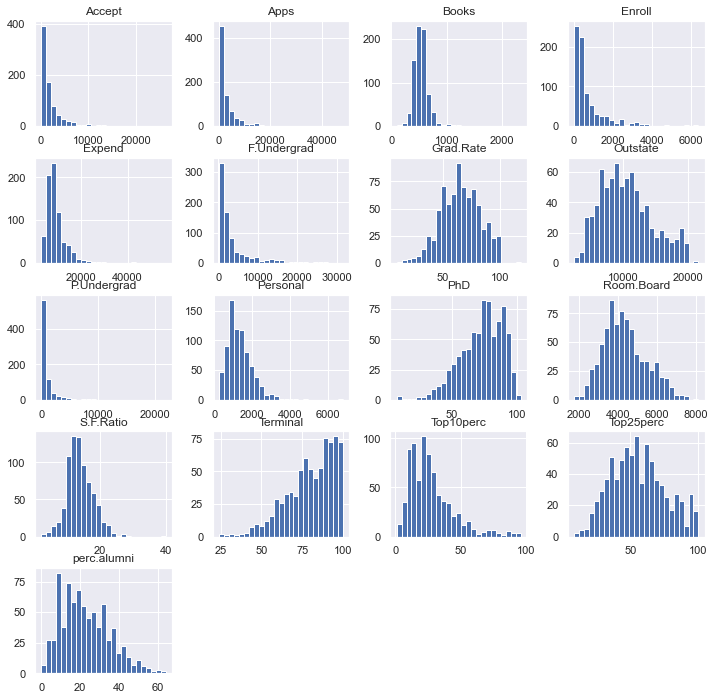

In [4]:
df = pd.read_csv('data/college.csv')
df.hist(figsize=(12, 12), bins=25)

In [5]:
# 1. Which columns are possibly from a normal distribution?
alpha = 1e-3

for c in df.columns[2:]:
    k2, p = stats.normaltest(df[c])
    if p < alpha:  # null hypothesis: c comes from a normal distribution
        print(f'The null hypothesis can be rejected: {c} is not a normal distribution ')
    else:
        print(f'The null hypothesis cannot be rejected: {c} is a normal distribution ')

The null hypothesis can be rejected: Apps is not a normal distribution 
The null hypothesis can be rejected: Accept is not a normal distribution 
The null hypothesis can be rejected: Enroll is not a normal distribution 
The null hypothesis can be rejected: Top10perc is not a normal distribution 
The null hypothesis can be rejected: Top25perc is not a normal distribution 
The null hypothesis can be rejected: F.Undergrad is not a normal distribution 
The null hypothesis can be rejected: P.Undergrad is not a normal distribution 
The null hypothesis can be rejected: Outstate is not a normal distribution 
The null hypothesis can be rejected: Room.Board is not a normal distribution 
The null hypothesis can be rejected: Books is not a normal distribution 
The null hypothesis can be rejected: Personal is not a normal distribution 
The null hypothesis can be rejected: PhD is not a normal distribution 
The null hypothesis can be rejected: Terminal is not a normal distribution 
The null hypothesi

In [6]:
# 2. Name which distribution could possibly fit them? 
#https://en.wikipedia.org/wiki/List_of_probability_distributions
# They are Poisson, Pareto or negative binomial distributions

In [7]:
# 3. Give 3 pairs of columns that are highly correlated?
# Enroll, F.Undergrad : 0.964640
# Apps, Accept : 0.943451
# Accept, Enroll : 0.911637

# 4. Give 3 column pairs that are not correlated?
# Books, Grad.Rate : 0.001061
# PhD, Personnal : -0.010936
# Accept, Outstate: -0.025755

df.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


### 2.2 Boxplot

Make a boxplot of private vs outstate colleges. It should look like:

![](boxplort.png)

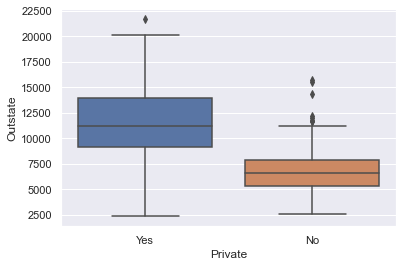

In [9]:
sns.boxplot(x='Private', y='Outstate', data=df)

# 3. Auto data

The `auto.csv` data file is malformed.

Fix it (using only python) so that it can be read into pandas, and then give a scatterplot matrix of horsepower, weight, year and mpg.

Did cars get more efficient over time? Make an argument on this question.

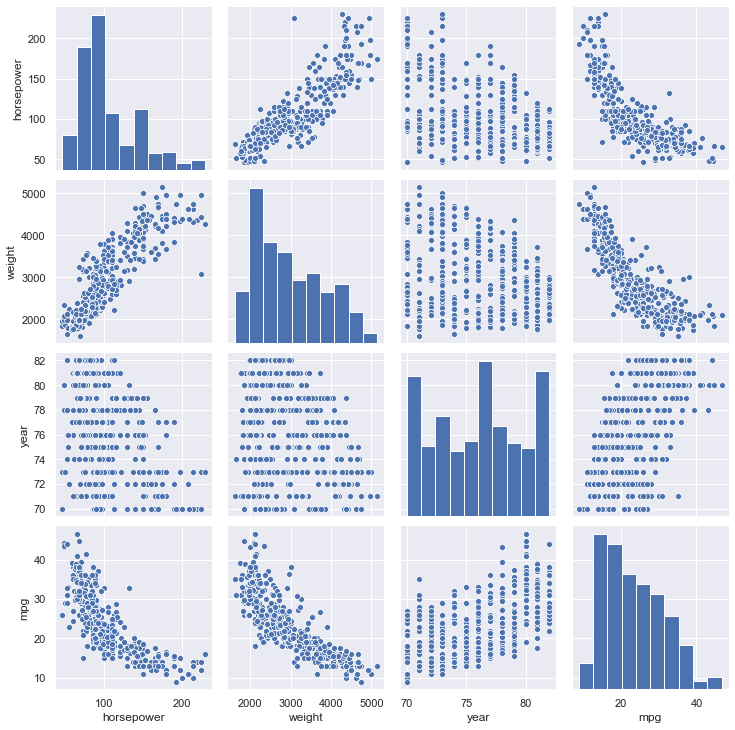

In [76]:
import numpy as np

names = ['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv('data/auto.csv', skiprows=[0,1], delim_whitespace=True, names = names)
df.horsepower = df.horsepower.replace('?', np.nan).astype('float')
sns.pairplot(df[['horsepower', 'weight', 'year', 'mpg']].dropna())
# miles per gallon increase over the years
# so yes the the efficiency seems to get better over time 

### 3.2 Auto Statistics

What is the mean, median and standard deviation of each quantitative feature?


In [9]:
# The 50 percentile is the same as the median.
df.describe()

,mpg,cylinders,horsepower weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 3.3 data removal

Remove the 10th through 85th observations. 

Does the mean statistically significantly change for each of the columns?



In [10]:
df2 = df.drop([df.index[10], df.index[85]])
df2.describe()
# no apparent difference, std deviation is similar

,mpg,cylinders,horsepower weight,acceleration,year,origin
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,5.227147,178.815789,2862.108033,15.788089,76.288089,1.631579
std,1.598067,96.732176,800.017119,2.650660,3.695357,0.819892
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,98.000000,2190.000000,14.100000,73.000000,1.000000
50%,4.000000,140.000000,2672.000000,15.500000,76.000000,1.000000
75%,6.000000,232.000000,3410.000000,17.300000,79.000000,2.000000
max,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000


# 4. Boston housing dataset

You can use `from sklearn.datasets import load_boston` to load the boston housing dataset.

The `load_boston()['DESCR']` will describe columns for you.

Are any of the columns associated with per capita crime rate? If so, show the numeric relationship and give a possible explanation for highly correlated/negatively correlated features

In [13]:
from sklearn.datasets import load_boston
boston = load_boston()
#print(boston.keys)
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.corr()

# RAD and TAX are correlated with CRIM , DIS and B are somewhat negatively correlated
# high TAX (low value buildings?) suburbs close to escape route (RAD) are more susceptible to crime (theft, robbery?)
# Black neiborhoods (B) close to employment centers (DIS) have less criminality

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


### 4.2 Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?




In [15]:
df = df.sort_values(by='CRIM', ascending=False)
df.head(10) 

# yes, highest CRIM rate areas are in the 75% pctile for PTRATIO and also TAX rate
# in comparison to df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
404,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59
427,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52
413,28.6558,0.0,18.1,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08
417,25.9406,0.0,18.1,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


### 4.3 How many of the suburbs in this data set bound the Charles river?

In [16]:
df.CHAS.sum()

35.0

### 4.4 What is the median pupil-teacher ratio among the towns in this data set?

In [17]:
df.PTRATIO.median()

19.05

### 4.5 Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.



In [18]:
df['MEDV'] = load_boston()['target']
df.sort_values(by='MEDV').head(1)

# very small land zoned (ZN) and relatively recent construction (AGE)
# in comparison to df.describe()
# trailer park? small condos?

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
329,0.06724,0.0,3.24,0.0,0.46,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,5.0


### 4.6 In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.




In [19]:
print(len(df.loc[df.RM > 7])) # 64 suburbs with > 7 rooms / dwelling (avg)
print(len(df.loc[df.RM > 8])) # 13 suburbs with > 8 rooms / dwelling (avg)
df7 = df.loc[df.RM > 7]
df8 = df.loc[df.RM > 8]

64
13


In [20]:
df8.describe()

# high value (MDEV), large properties (ZN), relatively old (AGE), higher status (LSTAT), close to Charles river (CHAS)
# a.k.a rich peoples

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,27.900000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,11.242998
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,15.200000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,19.400000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,24.400000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,32.900000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000
